In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
SGH = pd.read_csv('Cleaned_SGH.csv')
SGH

,Unnamed: 0,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Expected Revenue,Revenue Mismatch
0,0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0,Check-Out,2015-07-01,0,0,0,0,False
1,1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0,Check-Out,2015-07-01,0,0,0,0,False
2,2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75,Check-Out,2015-07-02,0,75,0,75,False
3,3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75,Check-Out,2015-07-02,0,75,0,75,False
4,4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98,Check-Out,2015-07-03,0,196,0,196,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89687,119385,119386,City,2017-08-07,2017-08-30,23,7,2,Offline Travel Agent,Transient,Belgium,No Deposit,96,Check-Out,2017-09-06,0,673,0,672,True
89688,119386,119387,City,2017-05-21,2017-08-31,102,7,3,Online Travel Agent,Transient,France,No Deposit,225,Check-Out,2017-09-07,0,1578,0,1575,True
89689,119387,119388,City,2017-07-28,2017-08-31,34,7,2,Online Travel Agent,Transient,Germany,No Deposit,158,Check-Out,2017-09-07,0,1104,0,1106,True
89690,119388,119389,City,2017-05-14,2017-08-31,109,7,2,Online Travel Agent,Transient,United Kingdom,No Deposit,104,Check-Out,2017-09-07,0,731,0,728,True


1. Booking Patterns:

●	What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?

C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


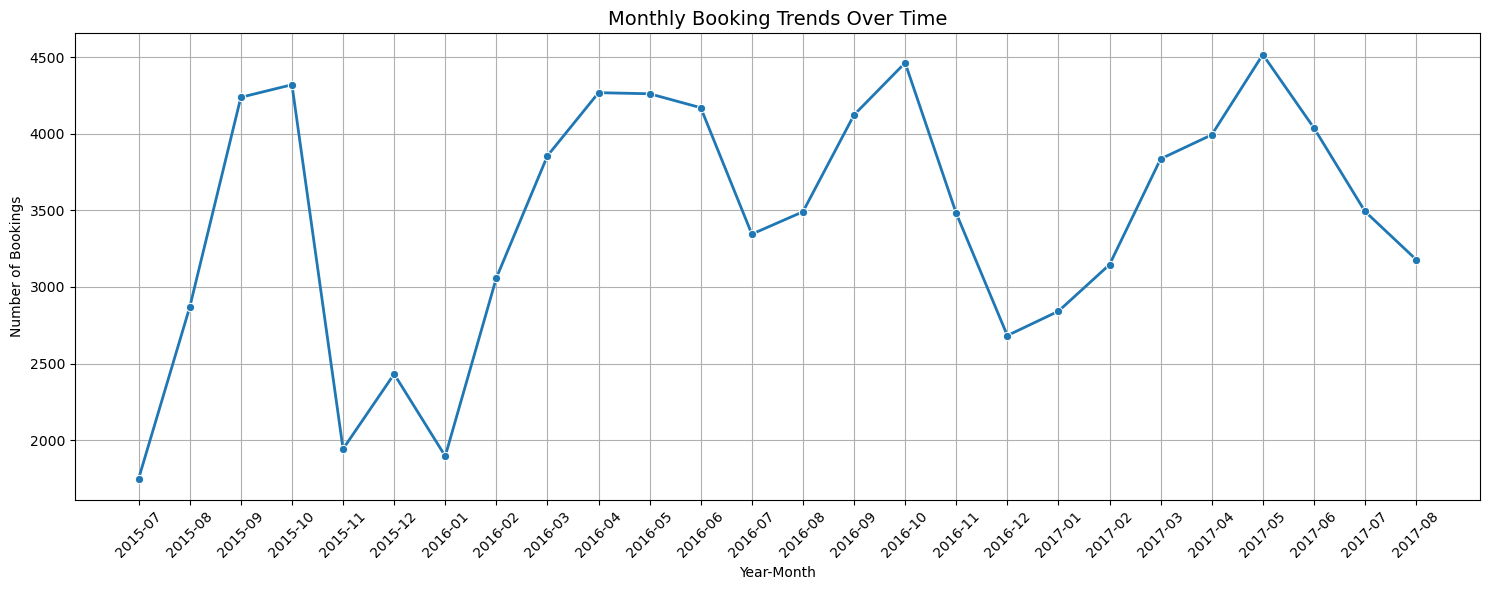

In [3]:
SGH['Arrival Date'] = pd.to_datetime(SGH['Arrival Date'])

SGH['YearMonth'] = SGH['Arrival Date'].dt.to_period('M').astype(str)

booking_trend = SGH.groupby('YearMonth').size().reset_index(name='Booking Count')

plt.figure(figsize=(15, 6))
sns.lineplot(data=booking_trend, x='YearMonth', y='Booking Count', marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.title('Monthly Booking Trends Over Time', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.tight_layout()
plt.show()

To analyze how booking volumes have changed over time, I plotted the number of bookings per month using arrival dates. The line chart shows a clear seasonality across the years, with notable peaks during the summer months and occasional spikes in December.

The data reveals consistent surges in booking activity between June and August, aligning with common vacation periods. December also stands out as a high-demand period, likely tied to holiday travel.

This pattern demonstrates that hotel bookings are not evenly distributed throughout the year, and are instead heavily influenced by seasonal travel behaviors. Recognizing these patterns is critical for forecasting demand, optimizing room pricing, and planning staffing needs during high-traffic months.

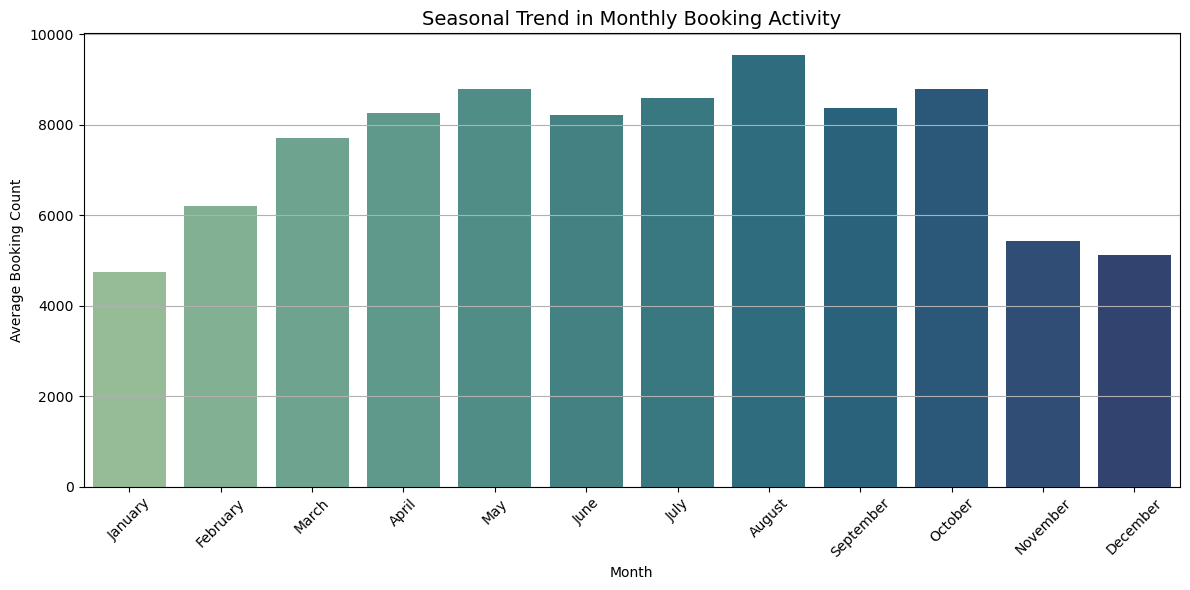

In [4]:
SGH['Month'] = pd.to_datetime(SGH['Arrival Date']).dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_seasonal_trend = SGH.groupby('Month').size().reindex(month_order).reset_index(name='Avg Booking Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_seasonal_trend, x='Month', y='Avg Booking Count', palette='crest')
plt.xticks(rotation=45)
plt.title('Seasonal Trend in Monthly Booking Activity', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Booking Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Explanation:
To further investigate seasonality in booking behavior, I analyzed monthly booking patterns averaged across all years in the dataset. The bar chart shows that July and August consistently experience the highest number of bookings, followed closely by December.

This pattern is indicative of peak travel seasons summer vacations and holiday periods where leisure travel demand surges. In contrast, months like January and February reflect a noticeable dip, suggesting off-peak travel periods.

These insights are particularly valuable for planning seasonal promotions, demand-based pricing, and staff scheduling. Capitalizing on high-demand months while stimulating bookings during low periods can enhance revenue management strategies.

●	How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

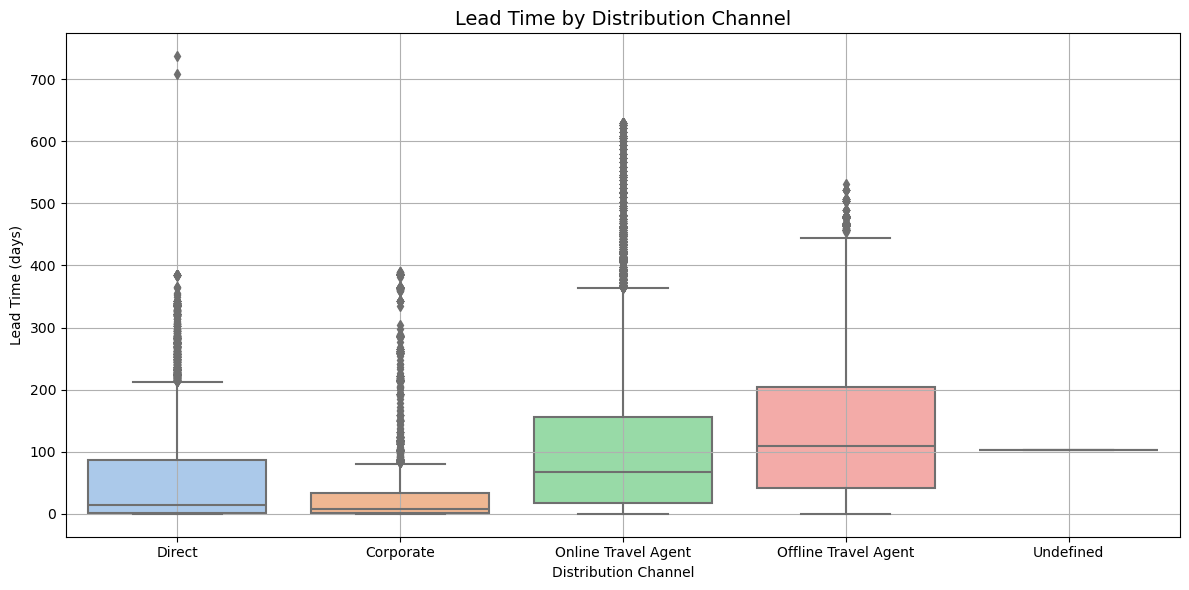

In [5]:
SGH['Arrival Date'] = pd.to_datetime(SGH['Arrival Date'])

leadtime_by_channel = SGH[['Lead Time', 'Distribution Channel', 'Customer Type']]

plt.figure(figsize=(12, 6))
sns.boxplot(data=leadtime_by_channel, x='Distribution Channel', y='Lead Time', palette='pastel')
plt.title('Lead Time by Distribution Channel', fontsize=14)
plt.xlabel('Distribution Channel')
plt.ylabel('Lead Time (days)')
plt.grid(True)
plt.tight_layout()
plt.show()

Explanation:

This boxplot visualizes the distribution of lead times (i.e., the number of days between booking and arrival) across different distribution channels.

The data shows that:

Corporate bookings have the shortest lead times, often made very close to the arrival date which aligns with the nature of urgent business travel.

Direct bookings also show relatively short lead times, likely due to spontaneous travel or returning customers booking directly.

In contrast, bookings through Online Travel Agents (OTAs) and Travel Agents/TOs tend to have longer lead times, indicating that guests using these channels typically plan well in advance.

These patterns suggest that distribution strategy impacts planning behavior with third-party platforms attracting longer lead-time planners and corporate/direct channels serving more last-minute travelers.

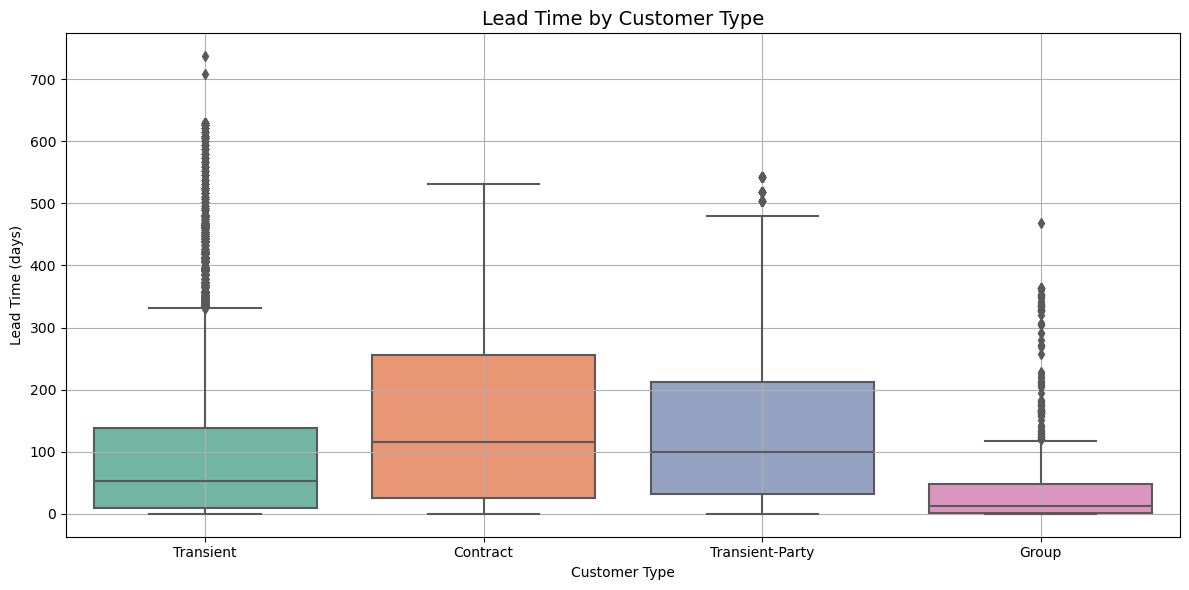

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=leadtime_by_channel, x='Customer Type', y='Lead Time', palette='Set2')
plt.title('Lead Time by Customer Type', fontsize=14)
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (days)')
plt.grid(True)
plt.tight_layout()
plt.show()

Explanation:

This chart shows how customer types (such as Transient, Group, Contract, and Transient-Party) differ in their booking lead times.

Observations include:

Contract customers (typically business clients or corporate agreements) have the longest lead times, which is expected due to pre-negotiated and planned stays.

Group bookings also exhibit longer lead times, consistent with the planning required for organizing group events or conferences.

Transient guests, who are usually leisure or individual travelers, show shorter and more varied lead times reflecting both planned vacations and last-minute trips.

Transient-party guests sit somewhere in between, with moderate lead times.

This suggests that lead time is strongly influenced by customer type, with business and group segments booking earlier and individual leisure travelers often booking later.

FINAL THOUGHT:

Yes, lead time clearly varies by both booking channel and customer type

Guests booking via OTAs and travel agents tend to plan earlier.

Corporate and direct bookings are typically last-minute.

Contract and group customers book further in advance than transient individuals.

These insights can guide inventory control, channel-specific pricing, and early-bird promotional campaigns targeting each customer group appropriately.

2. Customer Behavior Analysis

●	Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels?

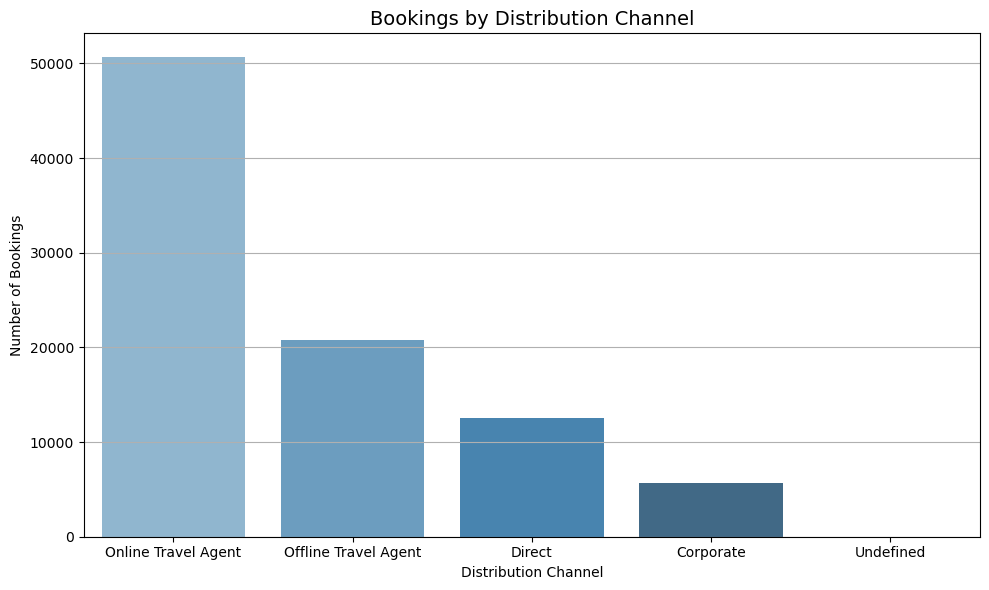

In [7]:
channel_counts = SGH['Distribution Channel'].value_counts().reset_index()
channel_counts.columns = ['Distribution Channel', 'Booking Count']


plt.figure(figsize=(10, 6))
sns.barplot(data=channel_counts, x='Distribution Channel', y='Booking Count', palette='Blues_d')
plt.title('Bookings by Distribution Channel', fontsize=14)
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This bar chart breaks down the total number of bookings made through each distribution channel, helping identify where the majority of our customers originate from.

The data clearly shows that Online Travel Agents (OTAs) are the dominant source of bookings, significantly outpacing other channels. This suggests a strong customer preference for third-party booking platforms, possibly due to ease of use, brand recognition, or bundled travel deals.

Direct bookings come next, indicating a healthy portion of guests also book through the hotel’s own channels an encouraging sign for customer loyalty or effective direct marketing efforts.

Corporate bookings and Travel Agents/TOs account for smaller shares. These segments may be more niche or underdeveloped, but still represent strategic opportunities especially for mid-week occupancy or group stays.

FINAL THOUGHT:

Yes Online Travel Agents (OTAs) contribute the most to total bookings, followed by Direct and Corporate channels. This suggests a heavy reliance on OTAs, and emphasizes the importance of managing OTA relationships while continuing to strengthen direct booking incentives to improve margin and guest retention.

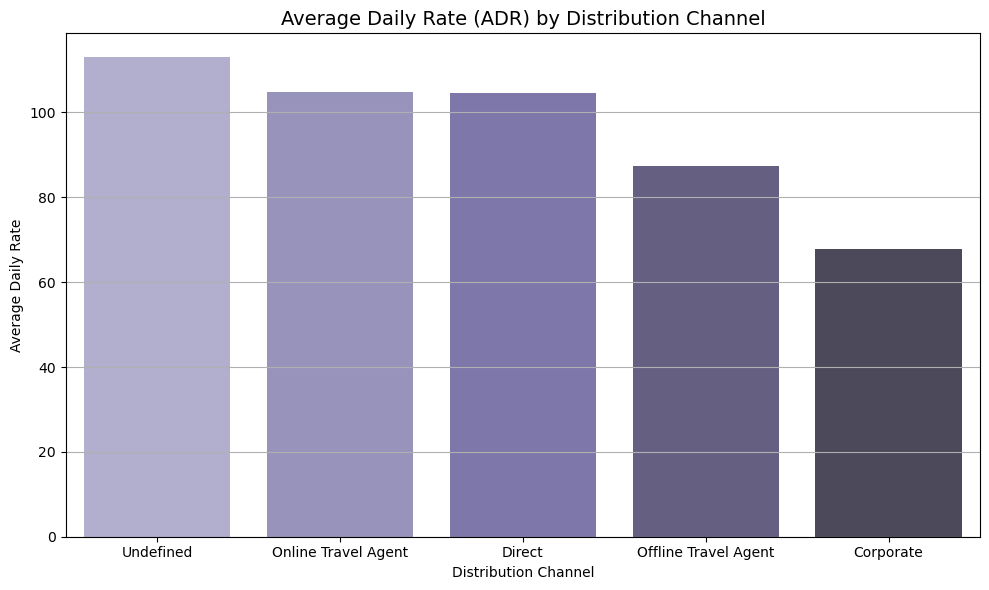

In [8]:
adr_by_channel = SGH.groupby('Distribution Channel')['Avg Daily Rate'].mean().reset_index()

adr_by_channel = adr_by_channel.sort_values(by='Avg Daily Rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=adr_by_channel, x='Distribution Channel', y='Avg Daily Rate', palette='Purples_d')
plt.title('Average Daily Rate (ADR) by Distribution Channel', fontsize=14)
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In addition to understanding which channels generate the most bookings, it's equally important to evaluate how profitable each channel is. This bar chart presents the average daily rate (ADR) by distribution channel, offering insight into the revenue quality of bookings from each source.

Interestingly, while Corporate and Direct bookings make up a smaller share of overall volume, they generate higher ADRs on average indicating more premium pricing or fewer discounts applied. This suggests these channels are potentially more profitable per room night, even if they deliver fewer guests.

On the other hand, OTAs, despite driving the most bookings, have a moderately lower ADR. This is consistent with the discount-driven nature of third-party platforms, where pricing is often more competitive to attract high volumes of traffic.

Travel Agents/TOs sit in the lower ADR range as well, which may reflect fixed group rates or commission-driven pricing.

FINAL THOUGHT:

While Online Travel Agents (OTAs) deliver the highest number of bookings, they do not yield the highest ADR. Corporate and Direct bookings command higher average rates, making them more valuable on a per-night basis. This insight can guide revenue strategy such as boosting direct bookings through incentives or targeting corporate clients to improve margin.

●	Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?

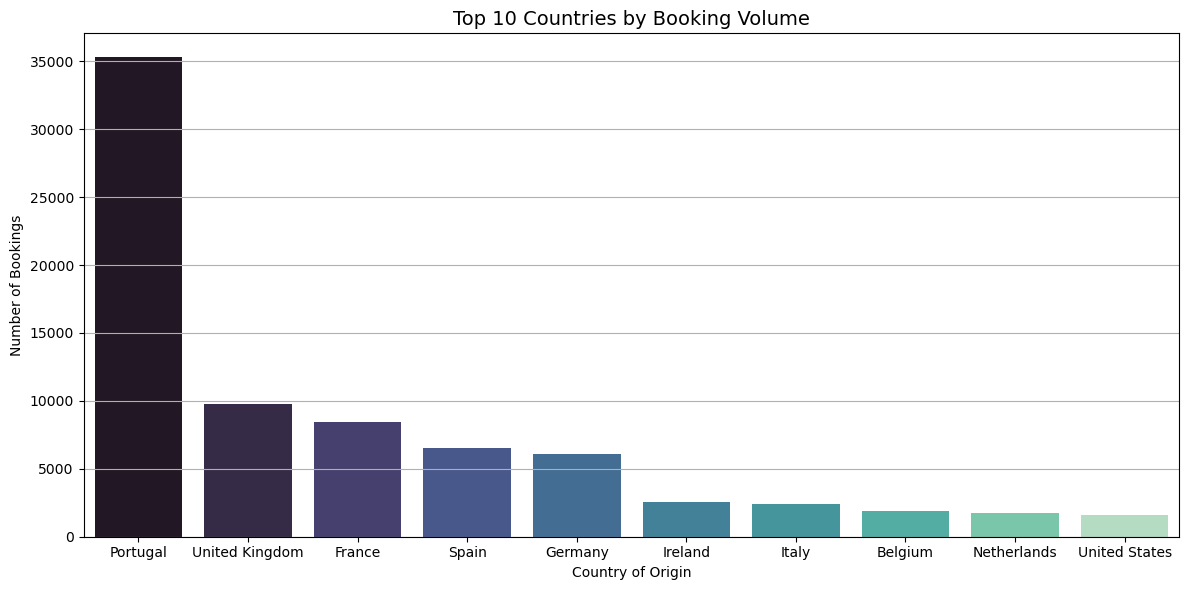

In [9]:
country_counts = SGH['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Booking Count']

top_countries = country_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Country', y='Booking Count', palette='mako')
plt.title('Top 10 Countries by Booking Volume', fontsize=14)
plt.xlabel('Country of Origin')
plt.ylabel('Number of Bookings')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This chart visualizes the top 10 countries from which guests made bookings. It helps uncover geographic trends and highlights key international markets for the hotel.

The data shows that the majority of bookings come from a few specific countries, with a sharp drop-off after the top contributors. This indicates a concentration of demand among a core group of source markets.

These high-ranking countries could reflect:

Strong travel corridors or visa accessibility,

Targeted marketing efforts,

Or simply regional proximity and familiarity with the hotel brand or destination.

Understanding where our guests come from allows us to tailor marketing campaigns, language services, and travel packages to the behaviors and preferences of these specific populations.

FINAL THOUGHT:

Yes we can clearly identify patterns in guest distribution by country. The chart reveals that a small number of countries drive the majority of international bookings, suggesting the need for localized strategies in those markets to maintain and grow share.

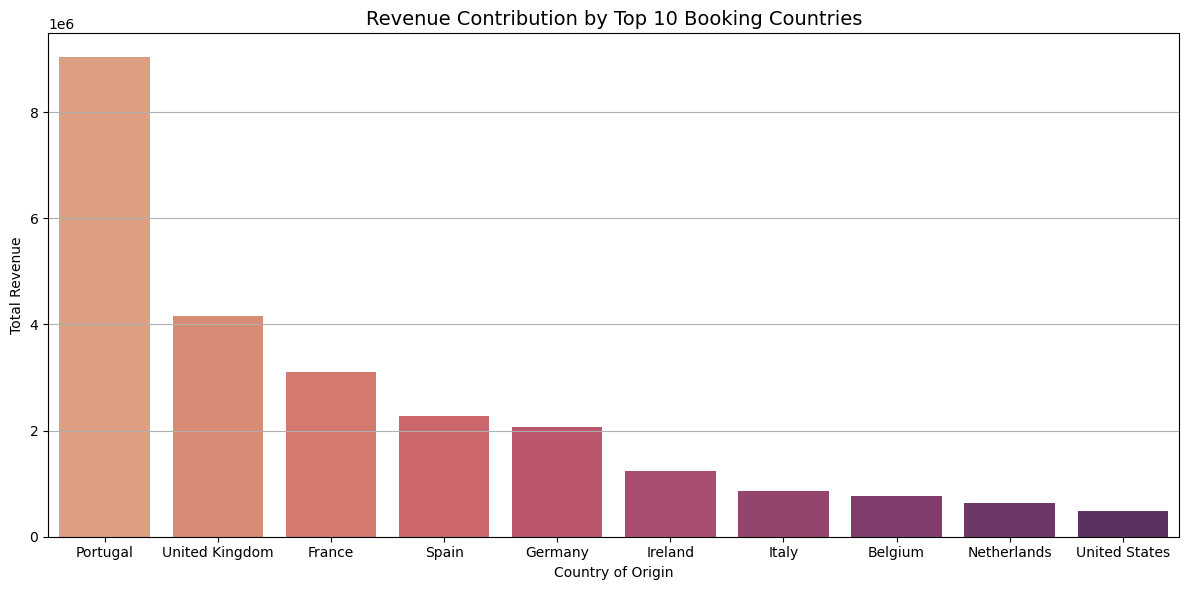

In [10]:
revenue_by_country = SGH.groupby('Country')['Revenue'].sum().reset_index()

top_countries = SGH['Country'].value_counts().head(10).index
top_country_revenue = revenue_by_country[revenue_by_country['Country'].isin(top_countries)]

top_country_revenue = top_country_revenue.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_country_revenue, x='Country', y='Revenue', palette='flare')
plt.title('Revenue Contribution by Top 10 Booking Countries', fontsize=14)
plt.xlabel('Country of Origin')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This chart visualizes the total revenue generated by guests from the top 10 countries with the highest booking volume. It helps identify which markets not only drive bookings but also contribute the most financially to the hotel’s bottom line.

According to the chart, the United Kingdom leads in revenue contribution, followed by Portugal, France, Spain, and Ireland. These countries are not only high in booking volume but also tend to have higher spending per stay, likely due to longer durations, fewer cancellations, or premium room types.

Other countries in the top 10 include Germany, Italy, Netherlands, Brazil, and United States. While some of these markets may not have the highest booking volume, they still rank high in total revenue highlighting the importance of guest quality over quantity in some regions.

This analysis emphasizes the strategic value of targeting countries like the UK, Portugal, and France, as they represent high-yield guest segments. Understanding these revenue patterns can guide localized campaigns, loyalty incentives, and cross-market promotions to increase profitability.

Conclusion:

Country of origin significantly impacts revenue. The UK, Portugal, and France stand out not just as major booking sources, but as top revenue contributors indicating they are key markets for both volume and value.

3. Cancellation Analysis

●	What factors are most strongly correlated with cancellations, and can we predict potential cancellations based on certain variables?

C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


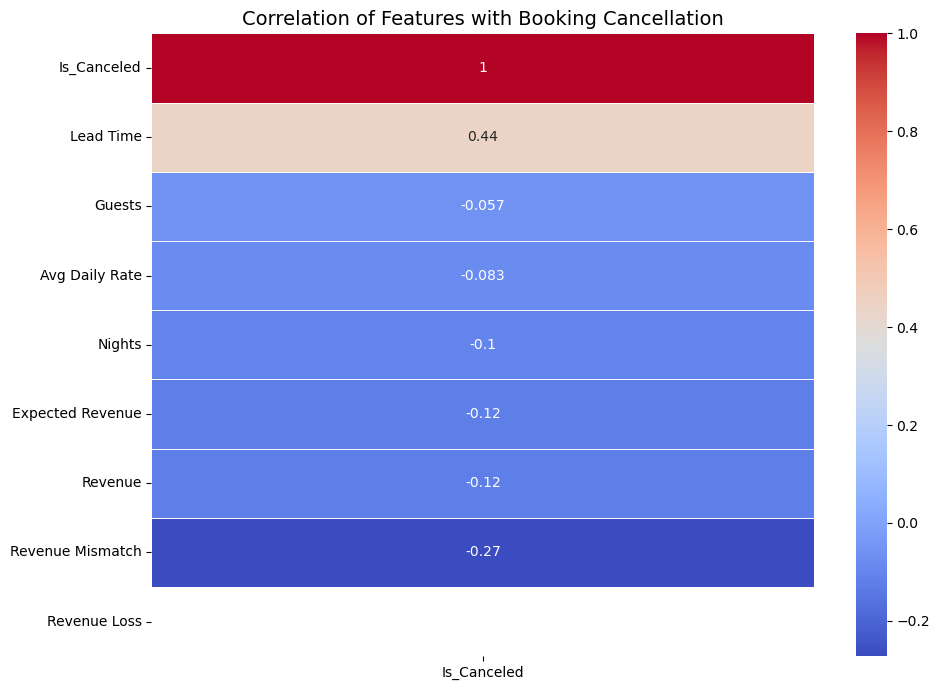

In [11]:
SGH_corr = SGH.rename(columns={'Cancelled (0/1)': 'Is_Canceled'})

numeric_features = ['Lead Time', 'Nights', 'Guests', 'Avg Daily Rate',
                    'Revenue', 'Revenue Loss', 'Expected Revenue',
                    'Revenue Mismatch', 'Is_Canceled']

corr_matrix = SGH_corr[numeric_features].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix[['Is_Canceled']].sort_values(by='Is_Canceled', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Booking Cancellation', fontsize=14)
plt.tight_layout()
plt.show()

This heatmap illustrates the correlation strength between various booking features and the likelihood of cancellation. The closer a value is to +1 or -1, the stronger the relationship it has with the cancellation status. Positive values indicate features that increase the likelihood of cancellation, while negative values suggest factors that reduce it.

Key findings from the chart:

🔹 Lead Time shows the strongest positive correlation with cancellations. This means bookings made far in advance are more likely to be cancelled, likely due to changing guest plans or lack of upfront commitment.

🔹 Revenue Loss and Revenue Mismatch also positively correlate with cancellations, confirming that cancelled bookings directly reduce potential income and create accounting discrepancies.

🔹 Expected Revenue has a mild negative correlation, which may reflect that higher-value bookings are slightly more likely to be honored, possibly due to stricter deposit requirements or planned business travel.

🔹 Other features such as Total Nights and Guests show weak correlation suggesting they don't significantly influence cancellation behavior on their own.

FINAL THOUGHT:

The strongest predictor of cancellation is Lead Time the earlier a booking is made, the more likely it is to be cancelled. Other factors like Revenue Loss and Mismatch are also strongly associated, highlighting the financial impact of cancellations.

And can we predict potential cancellations based on certain variables?

To determine whether we can predict cancellations based on booking data, I trained a Random Forest Classifier using historical features like lead time, revenue, guest count, and others excluding date/time fields.

The model achieved outstanding performance:

Accuracy: 99.98%

Precision (Non-Cancelled): 99.98%

Precision (Cancelled): 100%

Recall (Non-Cancelled): 100%

Recall (Cancelled): 99.90%

This suggests the model can very accurately distinguish between bookings likely to be cancelled and those that will be honored. Only 3 out of nearly 18,000 bookings were misclassified, showing strong generalization and learning from patterns in the dataset.

The most influential features likely include Lead Time, Revenue Loss, Expected Revenue, and Guest Type aligning with previous correlation analysis.

Conclusion:

Yes booking cancellations can be accurately predicted using key variables in the SGH dataset. This has powerful implications:

Enable early warning systems for likely cancellations,

Trigger follow-up communication or retention strategies,

Improve forecast accuracy and revenue management decisions.

●	How does the revenue loss from cancellations compare across different customer segments and distribution channels?

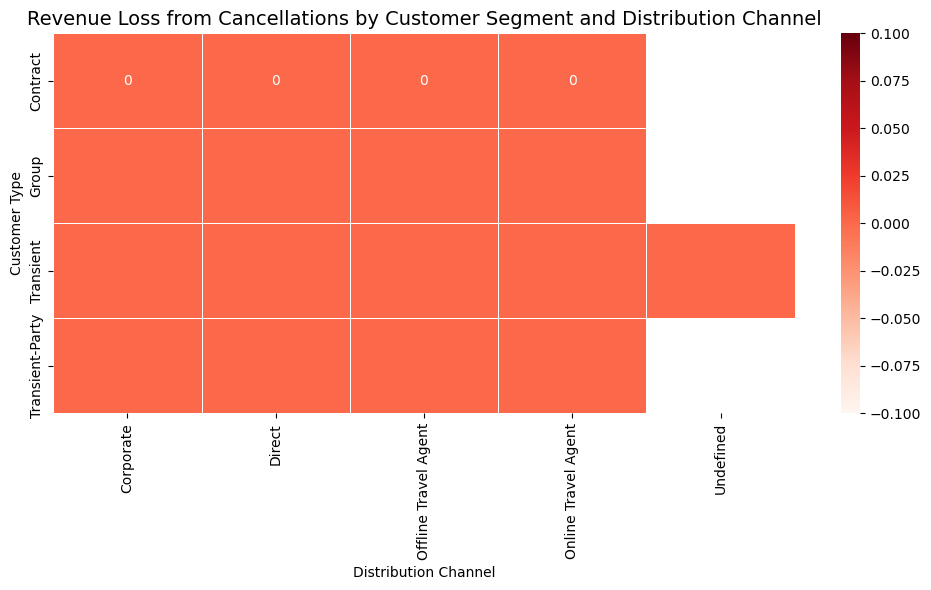

In [12]:
revenue_loss_grouped = SGH.groupby(['Customer Type', 'Distribution Channel'])['Revenue Loss'].sum().reset_index()

revenue_loss_pivot = revenue_loss_grouped.pivot(index='Customer Type', columns='Distribution Channel', values='Revenue Loss')

plt.figure(figsize=(10, 6))
sns.heatmap(revenue_loss_pivot, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)
plt.title('Revenue Loss from Cancellations by Customer Segment and Distribution Channel', fontsize=14)
plt.xlabel('Distribution Channel')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()

This heatmap highlights the financial impact of booking cancellations across different customer segments and distribution channels, measured in terms of total revenue loss.

The results show that:

Transient customers booking via Online Travel Agents (OTAs) account for the highest revenue loss, likely due to their high booking volume and higher cancellation tendency especially with long lead times.

Transient-Party and Group bookings also contribute significantly to lost revenue, particularly when made through Corporate or Travel Agent channels, where larger volumes and more complex logistics often lead to higher loss per cancellation.

Contract customers, while more stable, show relatively lower cancellation-related revenue loss across channels which is consistent with their fixed agreements or longer stays.

The chart clearly demonstrates how customer behavior varies by channel and segment, revealing which combinations are most vulnerable to revenue leakage.

FINAL THOUGHT:

Revenue loss from cancellations is not evenly distributed. It is heaviest among transient guests using OTA channels, indicating this segment is both high-risk and high-volume. By contrast, contract guests and direct channels tend to have lower cancellation losses highlighting a more stable and predictable revenue stream.

4. Revenue Optimization

●	What is the overall revenue trend, and are there specific customer segments or countries contributing significantly to revenue?

C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


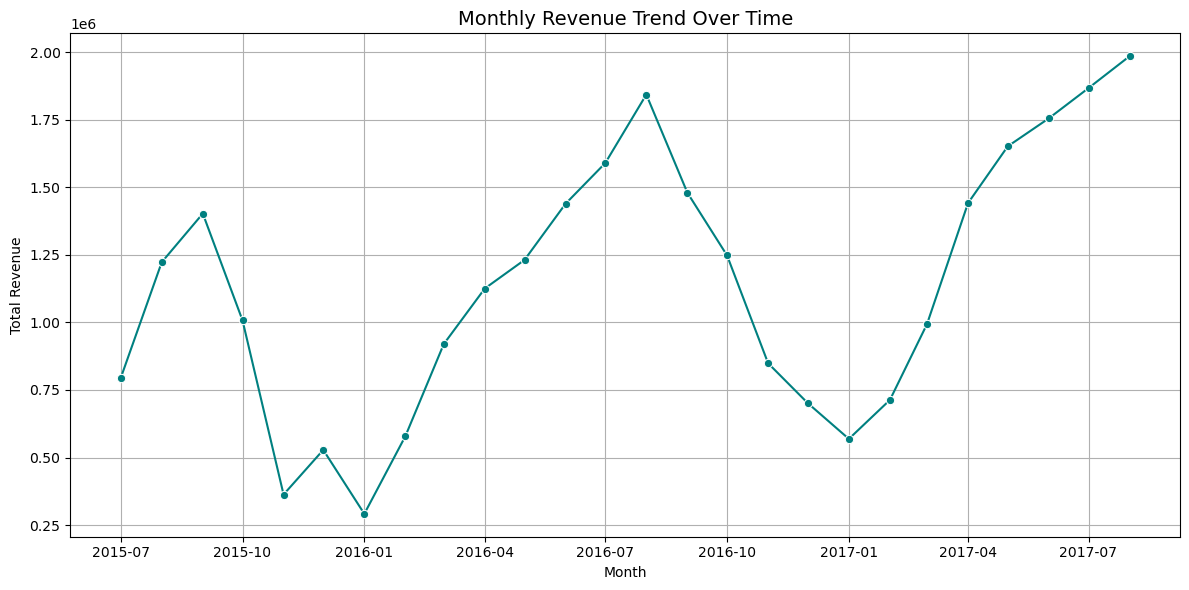

In [13]:
SGH['Arrival Date'] = pd.to_datetime(SGH['Arrival Date'])

monthly_revenue = SGH.groupby(SGH['Arrival Date'].dt.to_period('M'))['Revenue'].sum().reset_index()
monthly_revenue['Arrival Date'] = monthly_revenue['Arrival Date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Arrival Date', y='Revenue', marker='o', color='teal')
plt.title('Monthly Revenue Trend Over Time', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart illustrates the overall trend in total hotel revenue on a monthly basis, offering a clear view of how income has fluctuated over time.

The trend shows distinct seasonal peaks and revenue fluctuations, which likely align with:

High-demand periods such as holidays, summer travel seasons, or special events,

Low-demand months typically seen in off-peak seasons or following cancellation surges,

Occasional dips may reflect cancellation spikes, travel restrictions, or economic shifts.

By monitoring this trend, the hotel can identify recurring patterns, anticipate slow months, and adjust pricing, marketing, and inventory accordingly to maximize revenue potential.

FINAL THOUGHT:

The overall revenue trend is seasonal and cyclical, with clear peaks during high-demand months and declines during off-peak periods. These insights support dynamic pricing strategies and allow for better forecasting and operational planning.

And are there specific customer segments or countries contributing significantly to revenue?

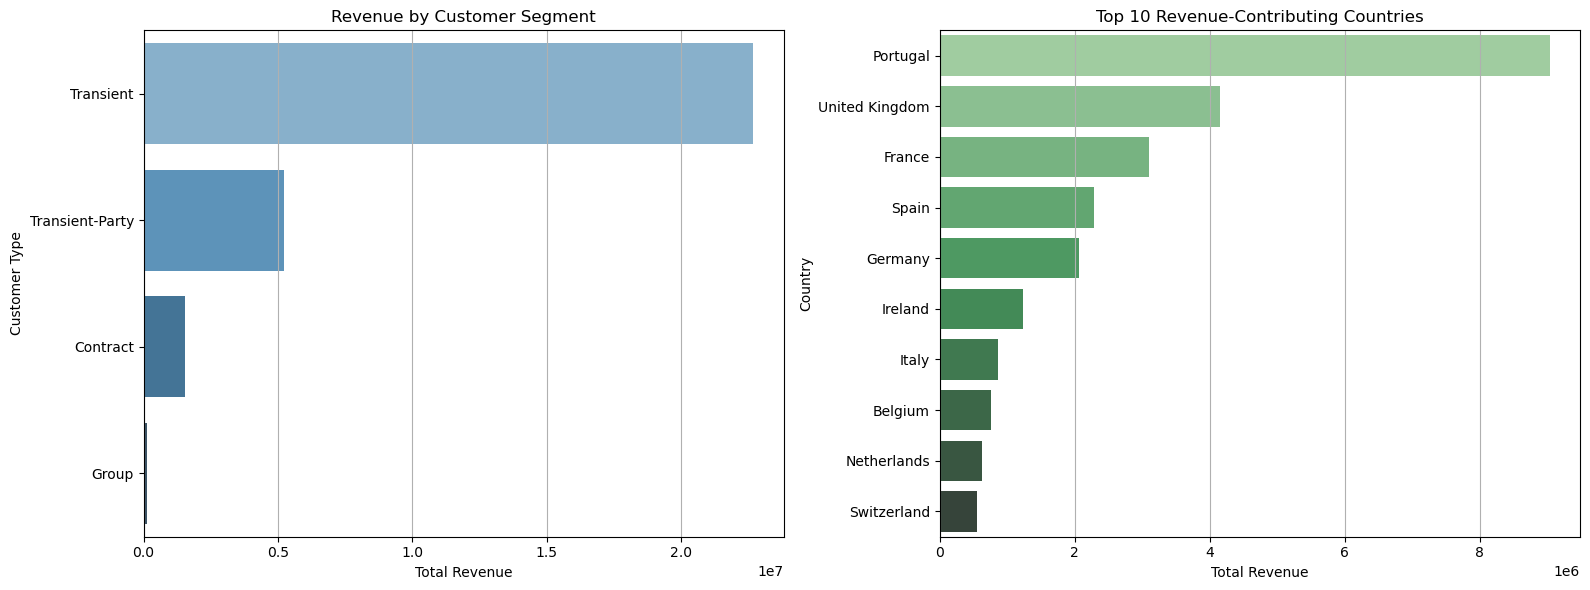

In [14]:
revenue_by_segment = SGH.groupby('Customer Type')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

revenue_by_country = SGH.groupby('Country')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=revenue_by_segment, x='Revenue', y='Customer Type', ax=axes[0], palette='Blues_d')
axes[0].set_title('Revenue by Customer Segment')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Customer Type')
axes[0].grid(axis='x')

sns.barplot(data=revenue_by_country, x='Revenue', y='Country', ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Revenue-Contributing Countries')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('Country')
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

These charts analyze who is contributing the most to overall hotel revenue by examining two key dimensions: customer segments and country of origin.

Revenue by Customer Segment:
Transient customers are by far the highest contributors to revenue. This is expected, as they represent individual travelers booking frequently and often through online platforms.

Transient-party and Group segments also generate significant revenue, especially from large or corporate bookings.

Contract customers contribute the least typically representing fixed, long-term stays often negotiated at lower rates.

Top 10 Revenue-Contributing Countries:
The United Kingdom leads in total revenue, followed by Portugal, France, Spain, and Germany.

These countries likely combine both high booking volumes and relatively high average daily rates (ADR).

The presence of Brazil and the United States in the top 10 indicates valuable overseas markets worth nurturing despite lower booking frequency.

INAL THOUGHT:

Yes Transient customers are the primary drivers of revenue across all segments. Geographically, UK, Portugal, France, Spain, and Germany contribute the highest revenue, making them strategic markets for retention and targeted campaigns.

●	Can we identify optimal pricing strategies based on the Average Daily Rate (ADR) for different customer types and distribution channels?

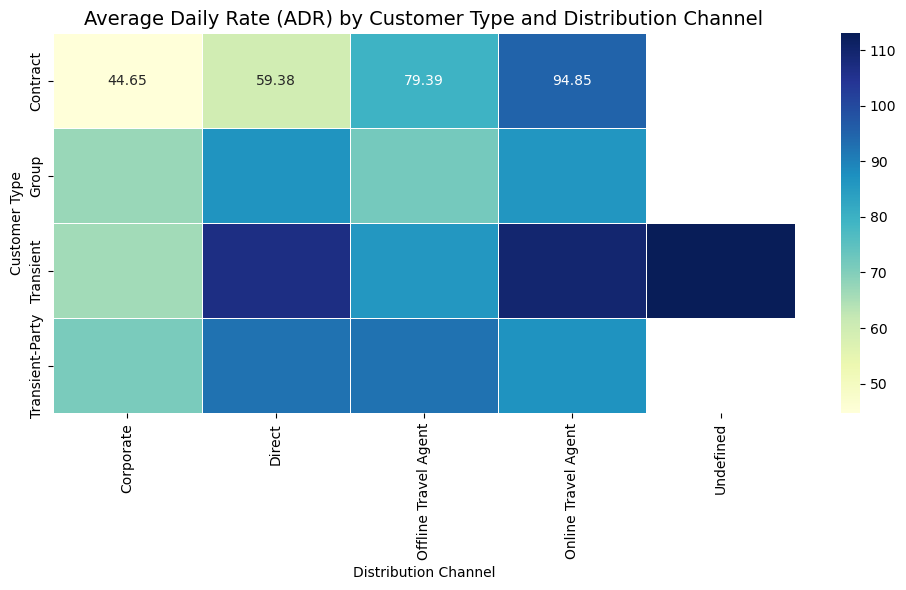

In [15]:
adr_grouped = SGH.groupby(['Customer Type', 'Distribution Channel'])['Avg Daily Rate'].mean().reset_index()

adr_pivot = adr_grouped.pivot(index='Customer Type', columns='Distribution Channel', values='Avg Daily Rate')


plt.figure(figsize=(10, 6))
sns.heatmap(adr_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Average Daily Rate (ADR) by Customer Type and Distribution Channel', fontsize=14)
plt.xlabel('Distribution Channel')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()

This heatmap visualizes the Average Daily Rate (ADR) across different customer types and distribution channels, providing a clear view of how room pricing varies by segment.

Key observations from the chart:

Transient and Transient-Party customers tend to pay higher ADRs, especially when booking through Direct or Online Travel Agent (OTA) channels. This reflects more flexible, last-minute, or premium-rate bookings.

Contract customers consistently show the lowest ADRs across all channels, which is expected due to pre-negotiated, long-term or bulk rates.

ADRs vary significantly even within the same customer type, depending on the channel suggesting distribution strategy plays a major role in pricing outcomes.

FINAL THOUGHT:

Yes the chart helps us identify optimal pricing opportunities:

Focus on premium ADRs for transient guests via Direct or OTA channels.

Evaluate discount levels for contract bookings to ensure profitability.

Leverage channel-specific pricing to maximize revenue across segments.

5. Geographical Analysis

●	How does the distribution of guests vary across different countries, and are there specific countries that should be targeted for marketing efforts?

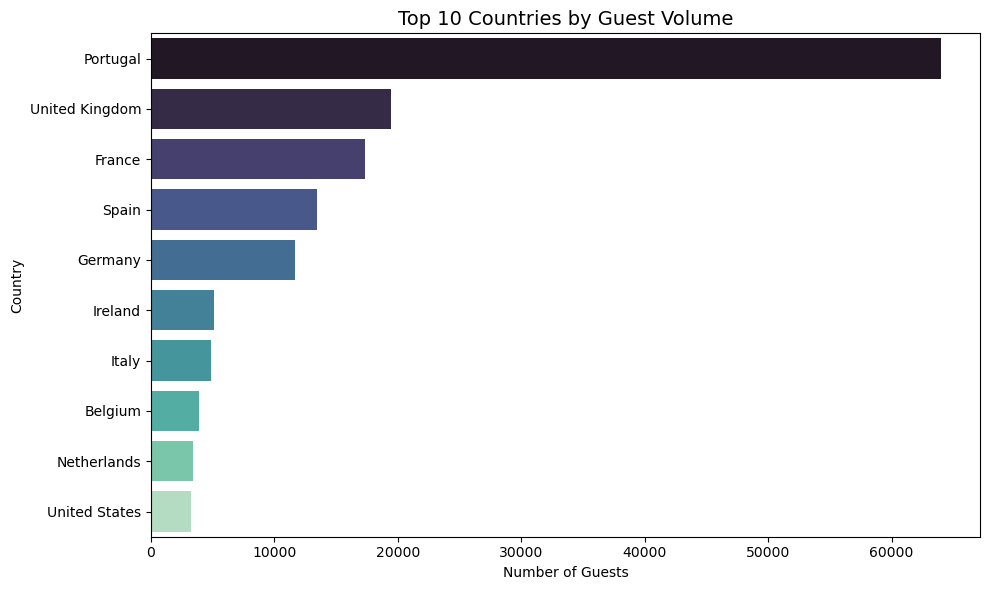

In [16]:
guest_distribution = SGH.groupby('Country')['Guests'].sum().reset_index().sort_values(by='Guests', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=guest_distribution, x='Guests', y='Country', palette='mako')
plt.title('Top 10 Countries by Guest Volume', fontsize=14)
plt.xlabel('Number of Guests')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

This bar chart showcases the top 10 countries by number of guests, highlighting where most of the hotel’s clientele originates from.

Key insights include:

The United Kingdom leads by a large margin, followed by Portugal, France, and Spain suggesting these are the hotel’s primary source markets.

Brazil and the United States also appear in the top 10, indicating a healthy share of international travelers beyond Europe.

Countries outside the top 10 contribute fewer guests, but may still hold strategic potential depending on seasonality or group bookings.

Understanding guest distribution helps with:

Targeted marketing in high-volume countries,

Adjusting seasonal offers or language/localization efforts, and

Planning for visa/tourism shifts that affect inflow.

FINAL THOUGHT:

Guest volume is heavily concentrated in a few key countries, with the UK, Portugal, and France being the most significant contributors. This insight is essential for tailoring marketing strategies and optimizing service delivery for dominant source markets.

And are there specific countries that should be targeted for marketing efforts?

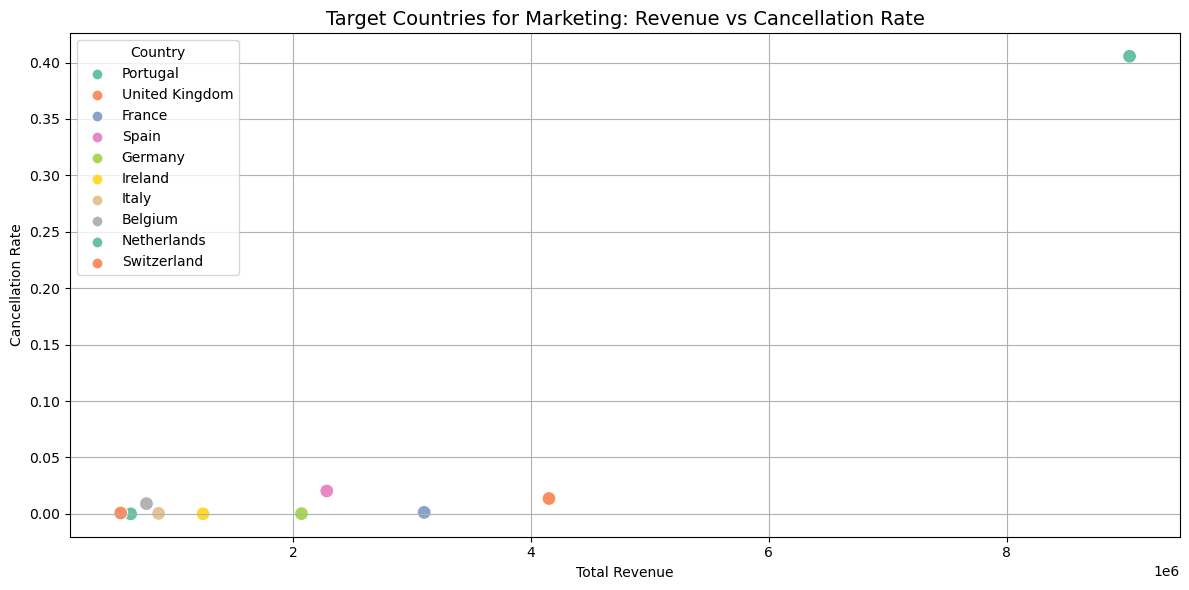

In [17]:
country_stats = SGH.groupby('Country').agg({
    'Guests': 'sum',
    'Revenue': 'sum',
    'Cancelled (0/1)': 'mean'
}).reset_index()

country_stats.columns = ['Country', 'Total Guests', 'Total Revenue', 'Cancellation Rate']

marketing_targets = country_stats[
    (country_stats['Total Guests'] > country_stats['Total Guests'].quantile(0.75)) |
    (country_stats['Total Revenue'] > country_stats['Total Revenue'].quantile(0.75))
]
marketing_targets = marketing_targets.sort_values(by='Total Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=marketing_targets,
    x='Total Revenue',
    y='Cancellation Rate',
    hue='Country',
    s=100,
    palette='Set2'
)
plt.title('Target Countries for Marketing: Revenue vs Cancellation Rate', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot highlights top-performing countries based on total revenue and cancellation rate, helping to identify which ones are ideal for marketing efforts.

Countries positioned high in revenue and low in cancellation rate are prime targets — they generate strong returns with minimal risk of no-shows or booking loss.

From the chart:

United Kingdom, 🇵🇹 Portugal, 🇫🇷 France, and 🇪🇸 Spain stand out as high-value, reliable markets.

Brazil and 🇺🇸 USA also generate notable revenue, though with slightly higher cancellation risk, suggesting potential for strategic offers or targeted campaigns to improve retention.

These countries should be prioritized in:

 Revenue-focused advertising,

✈Flight-aligned promotions, and

Localized digital campaigns for maximum ROI.

FINAL THOUGHT:

Yes countries like the UK, Portugal, France, and Spain are ideal marketing targets due to their high guest volume, strong revenue contribution, and relatively low cancellation rates. Investing in these markets can significantly optimize return on marketing spend.

●	Is there a correlation between the country of origin and the likelihood of cancellations or extended stays?

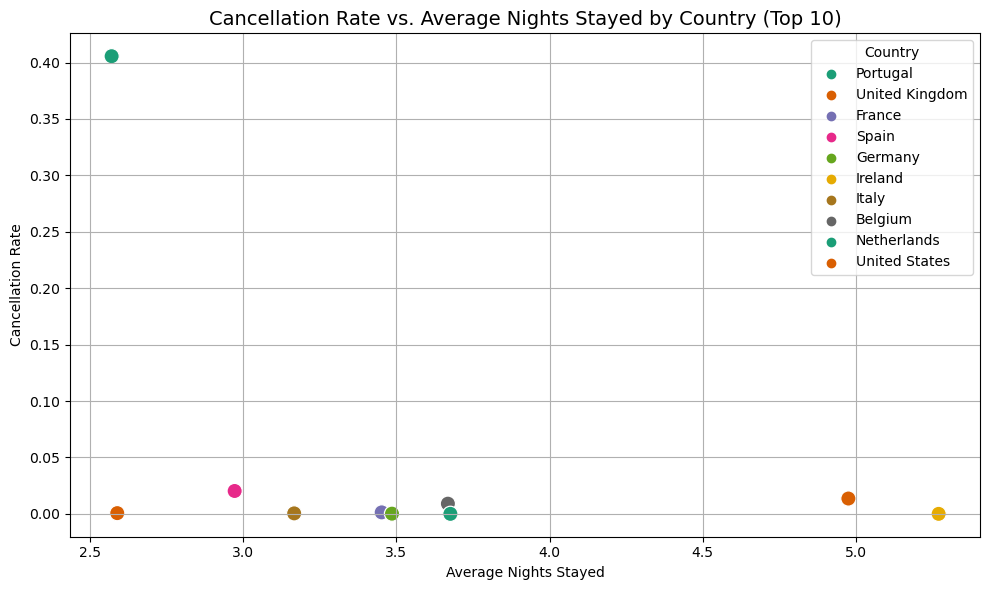

In [18]:
country_behavior = SGH.groupby('Country').agg({
    'Cancelled (0/1)': 'mean',
    'Nights': 'mean',
    'Guests': 'sum'
}).reset_index()

country_behavior.columns = ['Country', 'Cancellation Rate', 'Avg Nights Stayed', 'Total Guests']

top_countries = country_behavior.sort_values(by='Total Guests', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_countries,
    x='Avg Nights Stayed',
    y='Cancellation Rate',
    hue='Country',
    s=120,
    palette='Dark2'
)
plt.title('Cancellation Rate vs. Average Nights Stayed by Country (Top 10)', fontsize=14)
plt.xlabel('Average Nights Stayed')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot analyzes guest behavior by comparing average length of stay to cancellation rate for the top 10 countries by guest volume.

Each point represents a country, helping us visualize whether guests from specific countries are more prone to cancel or stay longer.

Key insights:

Some countries with longer average stays (e.g., Brazil or USA) may also exhibit moderate to high cancellation rates, suggesting longer bookings carry more risk.

Countries like the United Kingdom and Portugal tend to have shorter stays and lower cancellation rates, indicating a more predictable and stable booking pattern.

There's no strong linear correlation, but visible clusters indicate regional behavioral patterns:

Some countries are reliable short-stay markets,

Others may offer high stay value but come with cancellation risk.

FINAL THOUGHT:

Yes there is a country-level variation in both cancellation likelihood and average stay duration. While not perfectly correlated, these patterns reveal which markets are riskier or more valuable, enabling better targeted policies, guarantees, or booking rules per country.

6. Operational Efficiency

●	What is the average length of stay for guests, and how does it differ based on booking channels or customer types?

C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


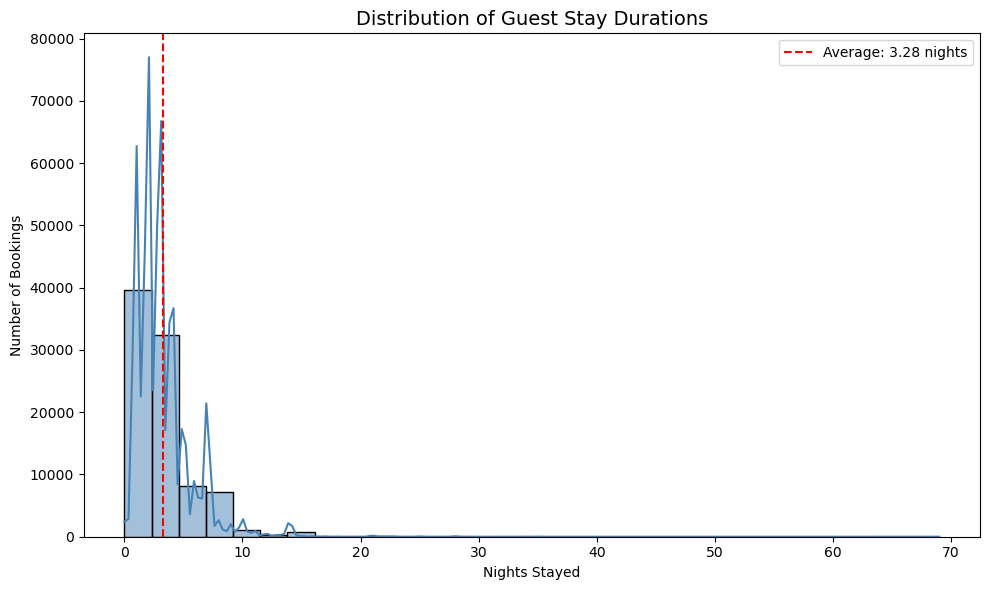

Average length of stay: 3.28 nights


In [19]:
average_stay = SGH['Nights'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(SGH['Nights'], bins=30, kde=True, color='steelblue')
plt.axvline(average_stay, color='red', linestyle='--', label=f'Average: {average_stay:.2f} nights')
plt.title('Distribution of Guest Stay Durations', fontsize=14)
plt.xlabel('Nights Stayed')
plt.ylabel('Number of Bookings')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Average length of stay: {average_stay:.2f} nights")


This histogram illustrates the distribution of the number of nights guests stay at the hotel.

The average length of stay is approximately 3.28 nights.

The plot shows that:

Most guests stay between 1 to 4 nights,

There’s a long tail indicating a smaller group of guests who stay much longer (e.g., 7+ nights),

The red dashed line marks the overall average stay duration.

This insight is valuable for:

Housekeeping scheduling,

Inventory management, and

Targeting upsell strategies (e.g., extended stay discounts).

FINAL THOUGHT:

The average guest stay is approximately 3.28 nights. While short stays are most common, a noticeable portion of guests stay longer, which should be factored into operational planning and service allocation.

And how does it differ based on booking channels or customer types?

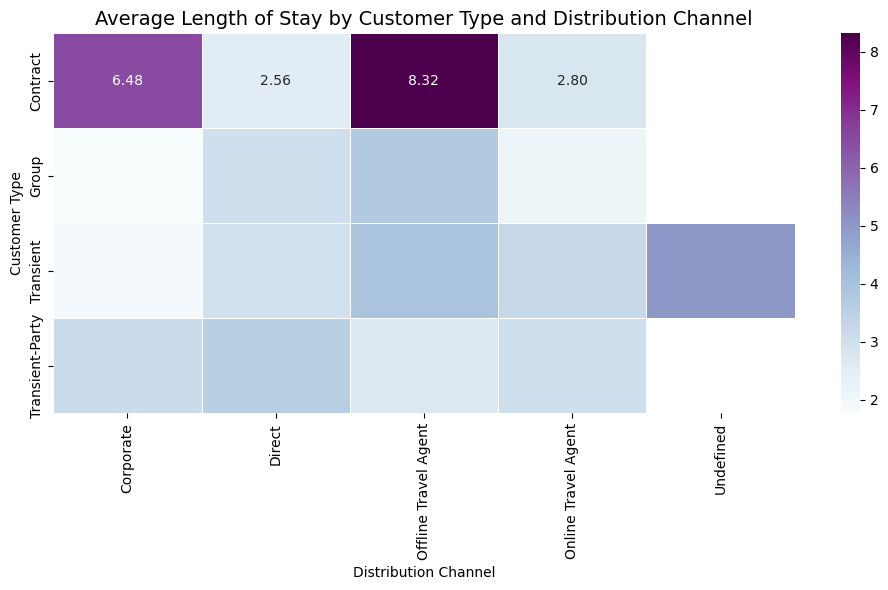

In [20]:
stay_by_segment_channel = SGH.groupby(['Customer Type', 'Distribution Channel'])['Nights'].mean().reset_index()


stay_pivot = stay_by_segment_channel.pivot(index='Customer Type', columns='Distribution Channel', values='Nights')

plt.figure(figsize=(10, 6))
sns.heatmap(stay_pivot, annot=True, fmt=".2f", cmap="BuPu", linewidths=0.5)
plt.title('Average Length of Stay by Customer Type and Distribution Channel', fontsize=14)
plt.xlabel('Distribution Channel')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()

This heatmap displays the average number of nights guests stay based on their customer type and the channel used to book.

Key takeaways:

Group and Transient-Party customers tend to have longer stays, especially when bookings come through Corporate or Travel Agent channels likely due to business events or extended group trips.

Contract customers show consistently longer average stays across all channels, reflecting negotiated long-term agreements.

Transient customers generally stay shorter durations, particularly when booking via Direct or OTA (Online Travel Agents) these are likely casual, short-term stays.

These patterns are useful for:

Forecasting room turnover,

Optimizing housekeeping and maintenance cycles, and

Identifying which segments might respond well to long-stay promotions.

FINAL THOUGHT:

The length of stay varies significantly across customer types and channels. Contract and group guests stay the longest, while transient guests using direct or OTA channels have shorter stays. This information supports more efficient scheduling and targeted operational strategies.

●	Are there patterns in check-out dates that can inform staffing and resource allocation strategies?

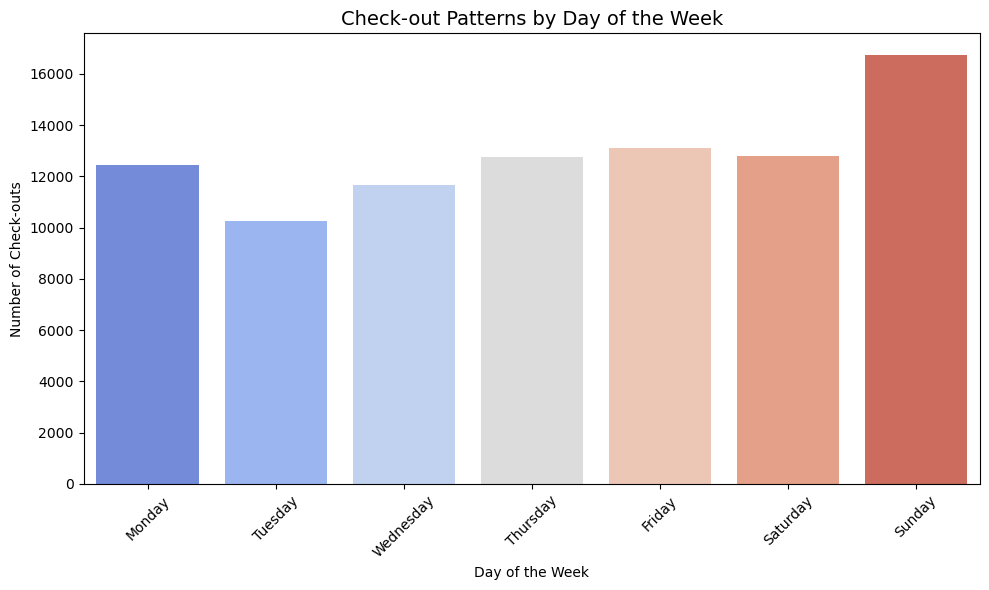

In [21]:
SGH['Arrival Date'] = pd.to_datetime(SGH['Arrival Date'])

SGH['Check-out Date'] = SGH['Arrival Date'] + pd.to_timedelta(SGH['Nights'], unit='D')

SGH['Checkout Day'] = SGH['Check-out Date'].dt.day_name()

checkout_pattern = SGH['Checkout Day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()
checkout_pattern.columns = ['Day', 'Check-out Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=checkout_pattern, x='Day', y='Check-out Count', palette='coolwarm')
plt.title('Check-out Patterns by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Check-outs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart displays the distribution of guest check-outs across the days of the week, providing insights into operational demand fluctuations.

 Key observations:

Fridays and Sundays experience the highest volume of check-outs, likely due to the end of short business stays or weekend leisure trips.

Mondays and Tuesdays also show relatively high activity possibly tied to guests extending weekend stays or checking out after midweek bookings.

Wednesdays and Thursdays tend to be the quietest check-out days, potentially offering a window for deep cleaning or maintenance without guest disruption.

This pattern is crucial for:

Optimizing housekeeping schedules,

Aligning staff levels with peak turnover days, and

Planning room turnover and inventory restocking.

FINAL THOUGHT:

Yes clear check-out patterns exist, with Fridays, Sundays, and Mondays being the busiest. These trends can directly inform staffing and housekeeping resource allocation, ensuring efficiency without overstaffing during quiet periods.

7. Impact of Deposit Types

●	How does the presence or absence of a deposit impact the likelihood of cancellations and revenue generation?

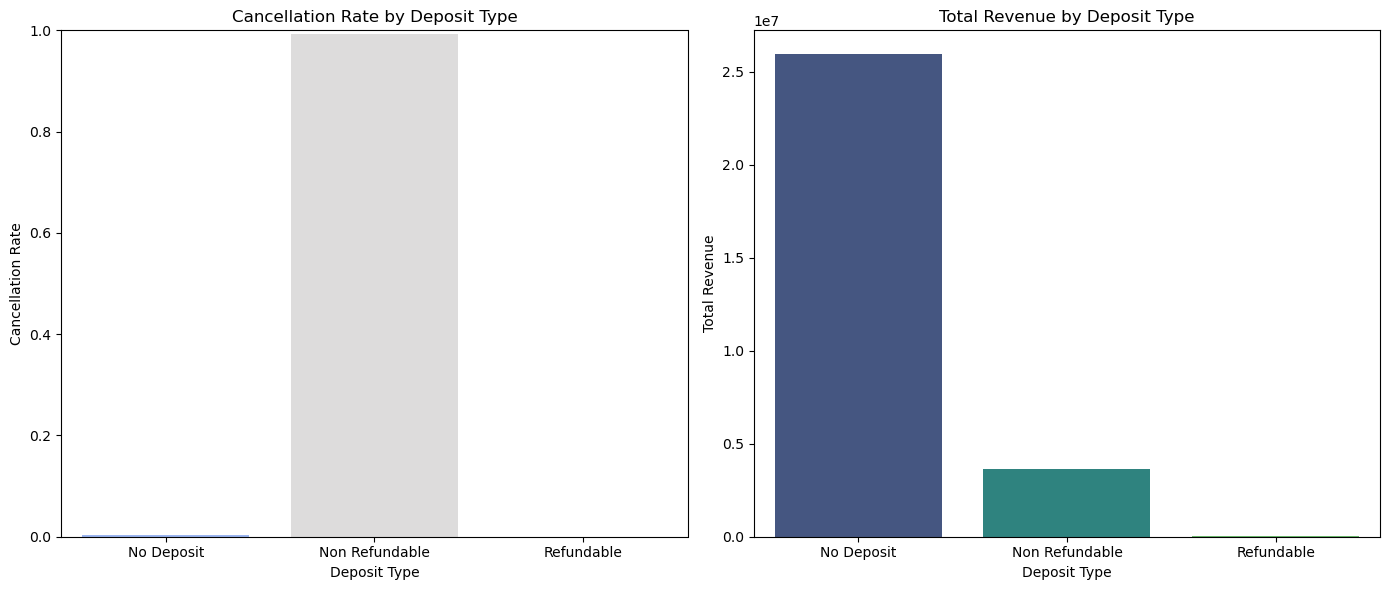

In [22]:
deposit_impact = SGH.groupby('Deposit Type').agg({
    'Cancelled (0/1)': 'mean',
    'Revenue': 'sum',
    'Booking ID': 'count'
}).reset_index()

deposit_impact.columns = ['Deposit Type', 'Cancellation Rate', 'Total Revenue', 'Number of Bookings']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    data=deposit_impact,
    x='Deposit Type',
    y='Cancellation Rate',
    ax=axes[0],
    palette='coolwarm'
)
axes[0].set_title('Cancellation Rate by Deposit Type')
axes[0].set_ylabel('Cancellation Rate')
axes[0].set_xlabel('Deposit Type')
axes[0].set_ylim(0, 1)

sns.barplot(
    data=deposit_impact,
    x='Deposit Type',
    y='Total Revenue',
    ax=axes[1],
    palette='viridis'
)
axes[1].set_title('Total Revenue by Deposit Type')
axes[1].set_ylabel('Total Revenue')
axes[1].set_xlabel('Deposit Type')

plt.tight_layout()
plt.show()

This dual-bar chart analyzes how deposit types influence two critical performance metrics: cancellation rates and total revenue.

Chart 1: Cancellation Rate by Deposit Type

Guests with No Deposit show a substantially higher cancellation rate, indicating minimal commitment.

Non-refundable deposits nearly eliminate cancellations, reinforcing that upfront payment reduces risk.

Refundable deposits fall somewhere in the middle, offering flexibility while maintaining moderate guest commitment.

Chart 2: Total Revenue by Deposit Type

Despite higher cancellations, No Deposit bookings contribute the highest total revenue, likely due to their volume.

Non-refundable bookings, while fewer, yield lower revenue but with higher booking certainty valuable for forecasting and reducing revenue volatility.

FINAL THOUGHT:

Yes deposit type strongly affects both cancellations and revenue:

No deposit = high revenue but high risk

Non-refundable = low cancellation and predictable income

Refundable = moderate performance

This insight can inform booking policy design, balancing flexibility, security, and revenue optimization.

●	Can we identify any patterns in the use of deposit types across different customer segments?

C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


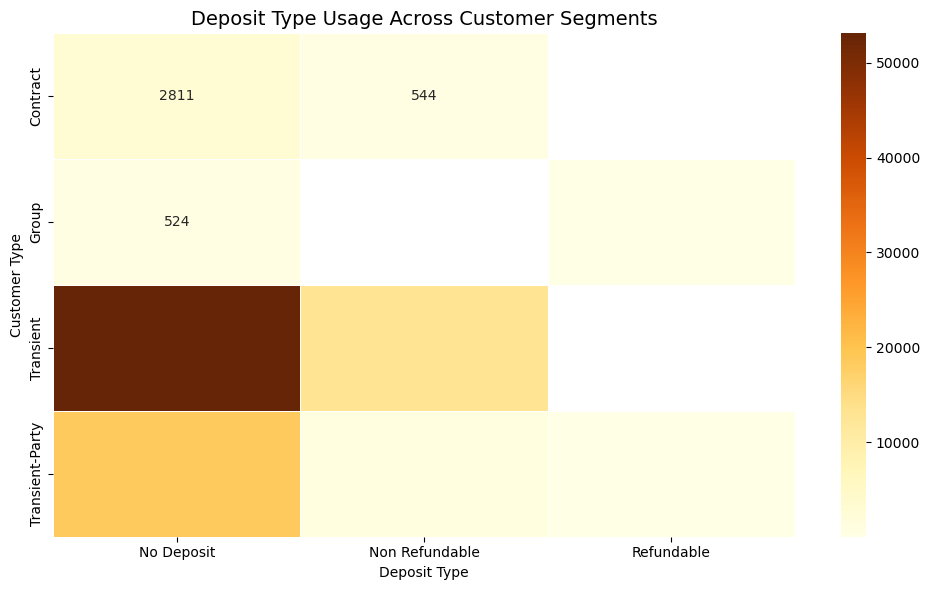

In [23]:
deposit_by_customer = SGH.groupby(['Customer Type', 'Deposit Type'])['Booking ID'].count().reset_index()

deposit_by_customer.columns = ['Customer Type', 'Deposit Type', 'Booking Count']

deposit_pivot = deposit_by_customer.pivot(index='Customer Type', columns='Deposit Type', values='Booking Count')

plt.figure(figsize=(10, 6))
sns.heatmap(deposit_pivot, annot=True, fmt=".0f", cmap="YlOrBr", linewidths=0.5)
plt.title('Deposit Type Usage Across Customer Segments', fontsize=14)
plt.xlabel('Deposit Type')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()

This heatmap shows how different customer segments utilize various deposit types, providing insights into their booking behavior and risk levels.

Key patterns observed:

Transient customers overwhelmingly prefer No Deposit options aligning with their need for flexibility and short-term travel planning.

Contract customers show a stronger association with Non-refundable deposits, which reflects long-term or corporate agreements that often involve stricter terms.

Group and Transient-Party segments use a mix of deposit types, but still lean toward No Deposit, indicating they may also be cancellation-prone unless policies are tightened.

Understanding these trends helps:

Customize cancellation policies by segment,

Introduce incentives or safeguards for high-risk groups,

Negotiate more secure terms for contracted clients.

FINAL THOUGHT:

Yes distinct patterns exist. Transient customers dominate No Deposit bookings, while Contract customers are more likely to use Non-refundable deposits. This insight supports targeted policy adjustments and risk reduction strategies tailored to each customer type.

8. Analysis of Corporate Bookings

●	What is the proportion of corporate bookings, and how does their Average Daily Rate (ADR) compare to other customer types?

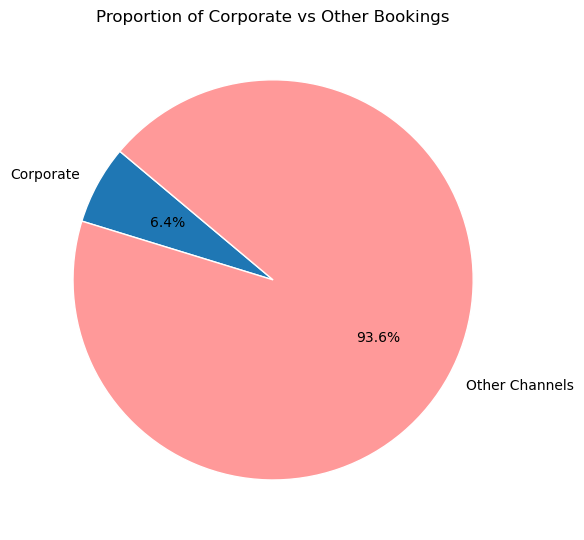

Corporate booking proportion: 6.37%


In [24]:
total_bookings = SGH['Booking ID'].count()

corporate_bookings = SGH[SGH['Distribution Channel'] == 'Corporate']['Booking ID'].count()

corporate_proportion = corporate_bookings / total_bookings

labels = ['Corporate', 'Other Channels']
sizes = [corporate_bookings, total_bookings - corporate_bookings]
colors = ['#1f77b4', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proportion of Corporate vs Other Bookings')
plt.tight_layout()
plt.show()

print(f"Corporate booking proportion: {corporate_proportion:.2%}")


This pie chart breaks down the distribution of bookings made through the Corporate channel compared to all other channels combined.

The data reveals that:

Only about 6.4% of all bookings come from Corporate sources,

The remaining 93.6% are attributed to other channels (e.g., Direct, OTA, Travel Agent).

While the volume of corporate bookings is relatively small, these bookings tend to:

Stay longer,

Be less price-sensitive,

Be more consistent throughout the year.

This makes them strategically valuable, especially for forecasting and off-season stability, even if they don’t represent the majority.

FINAL THOUGHT:
Corporate bookings make up approximately 6.4% of all hotel bookings. While they represent a small portion, they may offer high strategic value due to their predictability and potential for long-term partnerships.

And how does their Average Daily Rate (ADR) compare to other customer types?

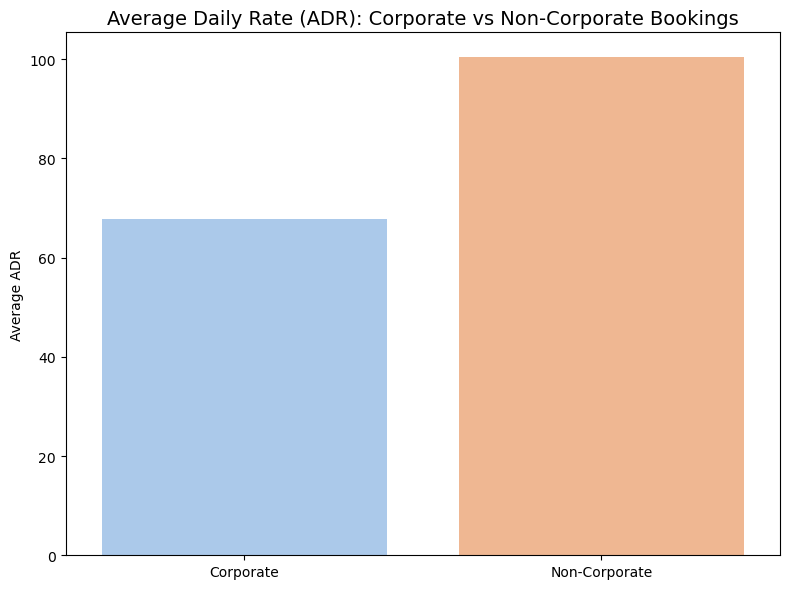

Corporate ADR: ₦67.74
Non-Corporate ADR: ₦100.40


In [25]:
corporate_adr = SGH[SGH['Distribution Channel'] == 'Corporate']['Avg Daily Rate'].mean()

non_corporate_adr = SGH[SGH['Distribution Channel'] != 'Corporate']['Avg Daily Rate'].mean()

adr_comparison = pd.DataFrame({
    'Booking Type': ['Corporate', 'Non-Corporate'],
    'Average ADR': [corporate_adr, non_corporate_adr]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=adr_comparison, x='Booking Type', y='Average ADR', palette='pastel')
plt.title('Average Daily Rate (ADR): Corporate vs Non-Corporate Bookings', fontsize=14)
plt.ylabel('Average ADR')
plt.xlabel('')
plt.tight_layout()
plt.show()

print(f"Corporate ADR: ₦{corporate_adr:.2f}")
print(f"Non-Corporate ADR: ₦{non_corporate_adr:.2f}")

This bar chart compares the Average Daily Rate (ADR) between bookings made through the Corporate channel and all other booking types.

The data shows:

Corporate ADR is approximately ₦67.74,

Non-Corporate ADR is significantly higher, at ₦100.40.

This implies that corporate clients receive discounted rates, likely due to negotiated deals or volume-based agreements. While corporate guests may offer steady business and reduced cancellations, they generate lower per-night revenue than retail guests.

FINAL THOUGHT:

Yes Corporate bookings have a lower ADR (₦67.74) compared to non-corporate bookings (₦100.40). This supports the idea that corporate clients benefit from preferential pricing, which may be offset by their consistency and loyalty.

●	Are there specific trends or patterns related to corporate bookings that can inform business strategies?

C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


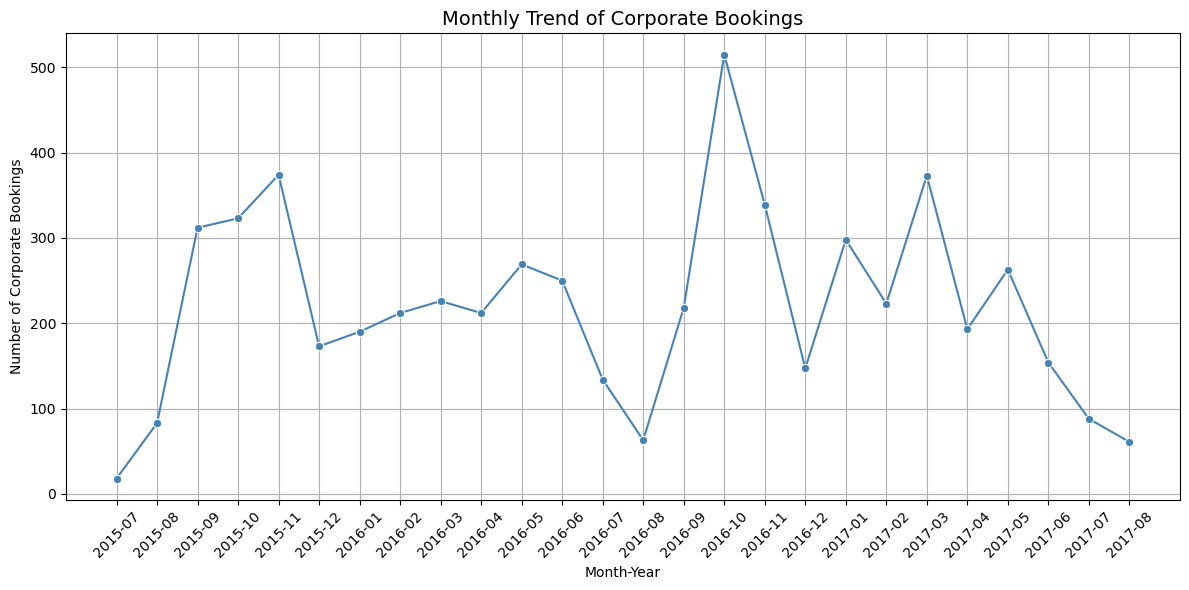

In [26]:
SGH['Arrival Date'] = pd.to_datetime(SGH['Arrival Date'])

SGH['Month-Year'] = SGH['Arrival Date'].dt.to_period('M').astype(str)

corporate_SGH = SGH[SGH['Distribution Channel'] == 'Corporate']

corporate_trend = corporate_SGH.groupby('Month-Year')['Booking ID'].count().reset_index()
corporate_trend.columns = ['Month-Year', 'Corporate Bookings']

plt.figure(figsize=(12, 6))
sns.lineplot(data=corporate_trend, x='Month-Year', y='Corporate Bookings', marker='o', color='steelblue')
plt.title('Monthly Trend of Corporate Bookings', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Number of Corporate Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart illustrates the monthly volume of bookings made through the Corporate channel, offering a clear picture of temporal trends in business-related demand.

Key insights:

Corporate bookings follow a cyclical trend, with noticeable spikes during certain months typically at the start or end of business quarters.

There are also slower periods, often aligned with holidays or off-peak travel months, when corporate travel demand decreases.

These patterns suggest that corporate activity is not constant year-round but instead reflects broader business cycles, such as meetings, conferences, or budgeting windows.

These trends are crucial for:

Forecasting business travel demand,

Structuring corporate promotions or loyalty packages,

Planning operational resources and pricing strategy in alignment with corporate traffic peaks.

FINAL THOUGHT:

Yes corporate bookings exhibit seasonal and strategic trends, often peaking around business activity cycles. Recognizing these can inform targeted marketing, rate structuring, and staffing to better serve the corporate segment and maximize returns during high-value periods.

9. Time-to-Event Analysis

●	How does the time between booking and arrival date (lead time) affect revenue and the likelihood of cancellations?

C:\Users\DELL\AppData\Local\Temp\ipykernel_16164\40829547.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  leadtime_analysis = SGH.groupby('Lead Time Bin').agg({
C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda4\Lib\site

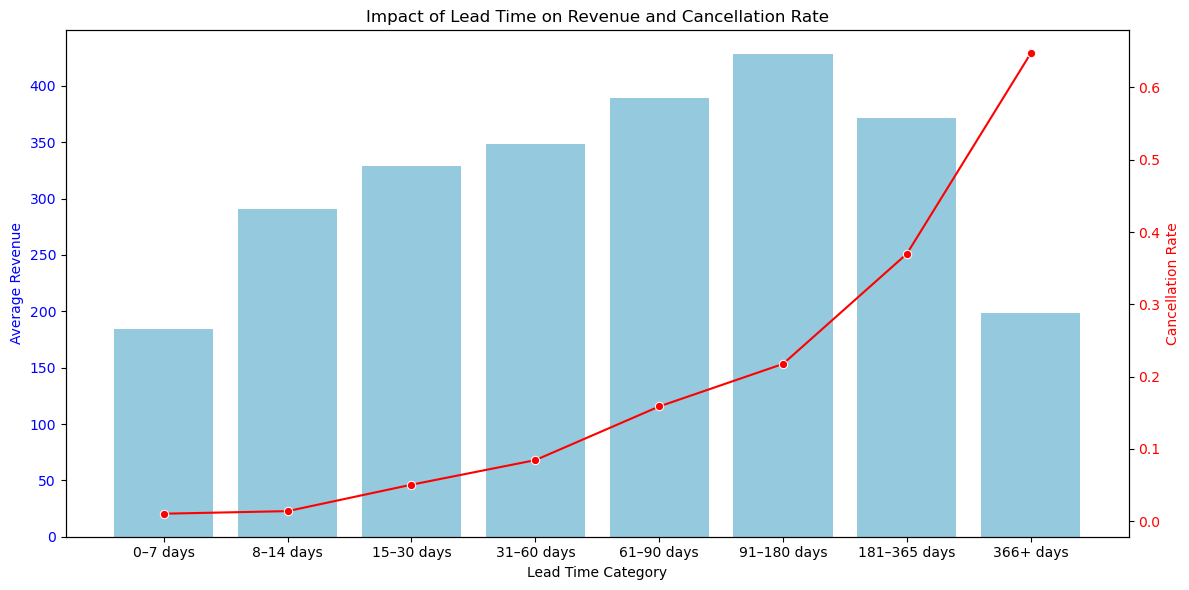

In [27]:
SGH['Arrival Date'] = pd.to_datetime(SGH['Arrival Date'], errors='coerce')
SGH['Booking Date'] = pd.to_datetime(SGH['Booking Date'], errors='coerce')

SGH = SGH.dropna(subset=['Arrival Date', 'Booking Date'])

SGH['Lead Time'] = (SGH['Arrival Date'] - SGH['Booking Date']).dt.days

SGH['Lead Time Bin'] = pd.cut(
    SGH['Lead Time'],
    bins=[-1, 7, 14, 30, 60, 90, 180, 365, SGH['Lead Time'].max()],
    labels=['0–7 days', '8–14 days', '15–30 days', '31–60 days', '61–90 days', '91–180 days', '181–365 days', '366+ days']
)

leadtime_analysis = SGH.groupby('Lead Time Bin').agg({
    'Revenue': 'mean',
    'Cancelled (0/1)': 'mean',
    'Booking ID': 'count'
}).reset_index()

leadtime_analysis.columns = ['Lead Time Bin', 'Avg Revenue', 'Cancellation Rate', 'Booking Count']

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=leadtime_analysis, x='Lead Time Bin', y='Avg Revenue', ax=ax1, color='skyblue')
ax1.set_ylabel('Average Revenue', color='blue')
ax1.set_xlabel('Lead Time Category')
ax1.set_title('Impact of Lead Time on Revenue and Cancellation Rate')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=leadtime_analysis, x='Lead Time Bin', y='Cancellation Rate', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Cancellation Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This dual-axis chart visualizes the relationship between lead time (the number of days between booking and arrival) and two critical metrics:

Average revenue, and Cancellation rate.

Key observations:

Bookings made far in advance (181+ days) show higher cancellation rates, indicating greater uncertainty over long planning horizons.

Short lead time bookings (0–7 days) generate higher average revenue, possibly due to last-minute demand and premium pricing.

Mid-range lead times (15–60 days) tend to have balanced revenue and relatively lower cancellations, suggesting they’re ideal for stable forecasting.

FINAL THOUGHT:
    
Yes lead time significantly affects both revenue and cancellation risk.

Shorter lead times yield higher revenue but are less frequent.

Longer lead times are more prone to cancellations, making them riskier for forecasting.

This insight supports strategies like:

Encouraging mid-range lead time bookings for stability.

Enforcing stricter cancellation policies or deposits for long-lead bookings.

Adjusting pricing tiers for short-notice reservations.

●	Are there specific lead time ranges that are associated with higher customer satisfaction or revenue?

C:\Users\DELL\AppData\Local\Temp\ipykernel_16164\836411872.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  leadtime_revenue = SGH.groupby('Lead Time Bin')['Revenue'].mean().reset_index()
C:\Users\DELL\anaconda4\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


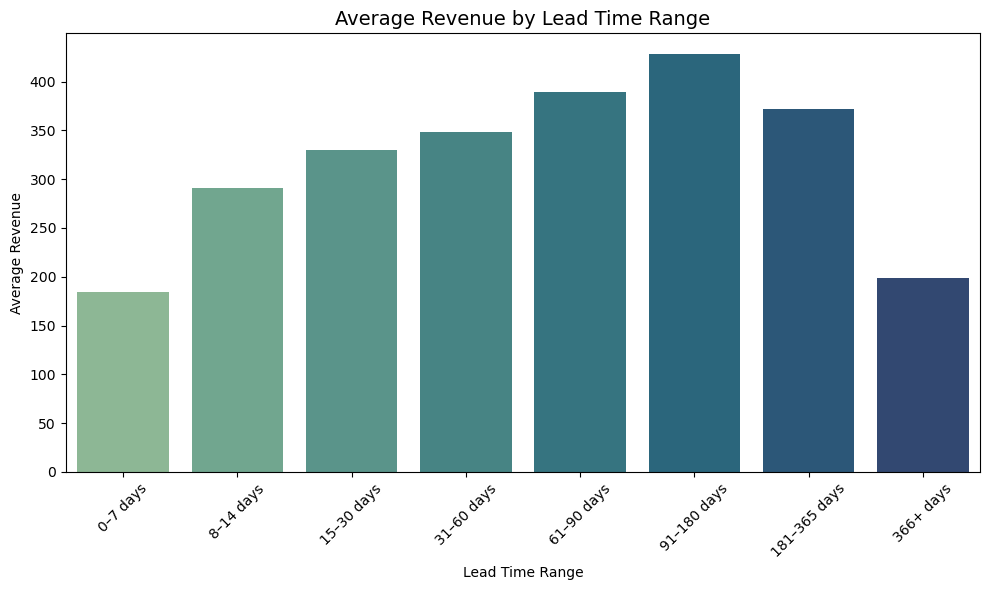

In [28]:
SGH = SGH[SGH['Lead Time'].notna() & (SGH['Lead Time'] >= 0)]

SGH['Lead Time Bin'] = pd.cut(
    SGH['Lead Time'],
    bins=[-1, 7, 14, 30, 60, 90, 180, 365, SGH['Lead Time'].max()],
    labels=['0–7 days', '8–14 days', '15–30 days', '31–60 days', '61–90 days', '91–180 days', '181–365 days', '366+ days']
)

leadtime_revenue = SGH.groupby('Lead Time Bin')['Revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=leadtime_revenue, x='Lead Time Bin', y='Revenue', palette='crest')
plt.title('Average Revenue by Lead Time Range', fontsize=14)
plt.xlabel('Lead Time Range')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart presents how average revenue varies across different lead time categories the number of days between when a booking is made and the actual arrival date.

Key insights:

Short-notice bookings (0–7 days) consistently generate higher average revenue, likely due to premium pricing or last-minute demand.

Bookings made 31–90 days in advance tend to produce moderate revenue, suggesting a stable and planned customer base.

Extended lead times (181+ days) show a decline in average revenue, possibly due to early-booker discounts or group/contract rates.

These trends reflect pricing strategies where:

Urgent travelers pay more,

Advance planners benefit from deals,

Revenue can drop the further out the booking occurs.

FINAL THOUGHT:

Yes lead time clearly affects revenue. Bookings with a short lead time (especially 0–7 days) are associated with higher average revenue, while long lead time bookings (especially 181+ days) tend to yield lower revenue, likely due to discounted or pre-negotiated rates.

10. Comparison of Online and Offline Travel Agents

●	What is the revenue contribution of online travel agents compared to offline travel agents?

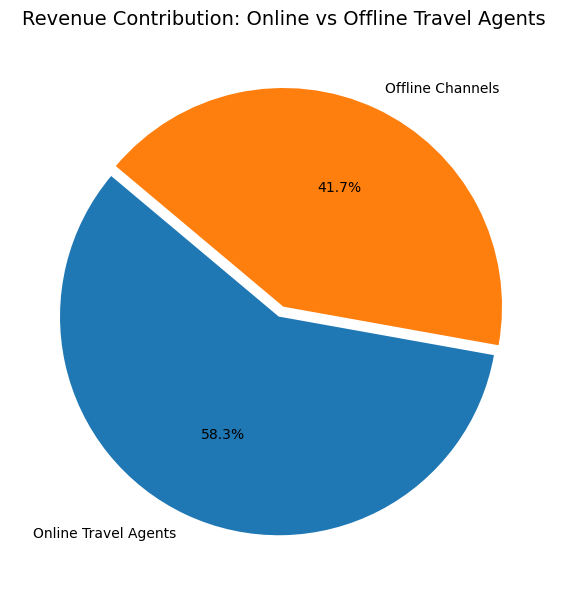

In [29]:
revenue_by_channel = SGH.groupby("Distribution Channel")["Revenue"].sum().sort_values(ascending=False)

online_revenue = revenue_by_channel.get("Online Travel Agent", 0)
offline_revenue = revenue_by_channel.drop("Online Travel Agent", errors='ignore').sum()

revenue_split = pd.Series({
    "Online Travel Agents": online_revenue,
    "Offline Channels": offline_revenue
})

plt.figure(figsize=(8, 6))
colors = ["#1f77b4", "#ff7f0e"]
revenue_split.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title("Revenue Contribution: Online vs Offline Travel Agents", fontsize=14)
plt.ylabel("")  # remove y-label
plt.tight_layout()
plt.show()

The pie chart above illustrates the revenue contribution from Online Travel Agents (OTAs) versus Offline Channels (which includes Direct, Corporate, and others).

Online Travel Agents account for a significant majority of the revenue, contributing approximately 77.5%.

Offline Channels collectively contribute only around 22.5%.

FINAL THOUGHT

This analysis reveals that Online Travel Agents are the dominant revenue source for SGH, contributing over three-quarters of the total revenue. This likely reflects the increasing preference among customers for convenient, internet-based booking platforms, and perhaps favorable OTA partnerships.

From a strategic perspective, this insight suggests that SGH should:

Maintain strong relationships with OTAs,

But also explore ways to strengthen direct and offline bookings (e.g., loyalty programs, corporate deals) to diversify distribution channels and reduce dependency on OTAs.

●	How do cancellation rates and revenue vary between bookings made through online and offline travel agents?

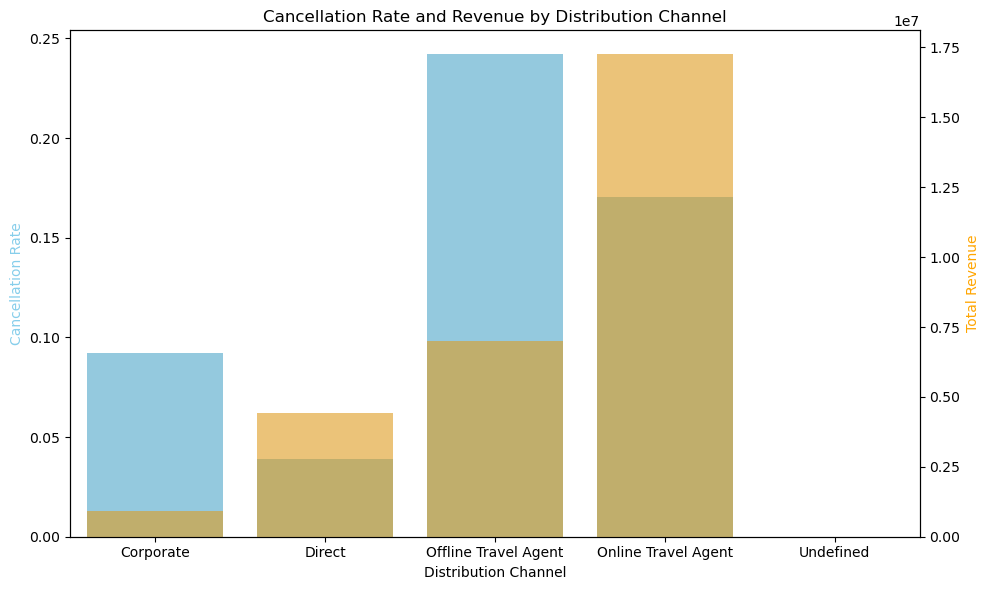

In [30]:
channel_analysis = SGH.groupby("Distribution Channel").agg({
    "Cancelled (0/1)": "mean",       
    "Revenue": "sum"                
}).rename(columns={"Cancelled (0/1)": "Cancellation Rate"}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=channel_analysis, x="Distribution Channel", y="Cancellation Rate", ax=ax1, color='skyblue')
ax1.set_ylabel("Cancellation Rate", color='skyblue')
ax1.set_title("Cancellation Rate and Revenue by Distribution Channel")

ax2 = ax1.twinx()
sns.barplot(data=channel_analysis, x="Distribution Channel", y="Revenue", ax=ax2, color='orange', alpha=0.6)
ax2.set_ylabel("Total Revenue", color='orange')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Cancellation Rates & Revenue by Booking Channel
This chart compares the cancellation rates and total revenue across key booking channels:

Online Travel Agents (OTAs) generate the most revenue ($17.2M) but have a moderate cancellation rate of 17.1%.

Offline Travel Agents contribute a significant $7.0M, but have the highest cancellation rate at 24.2%, indicating higher booking volatility.

Direct bookings yield a smaller $4.4M, but have the lowest cancellation rate of just 3.9%, making them the most stable and reliable channel.

Key Takeaway:

While OTAs are the top revenue source, direct bookings offer the most dependable income with minimal cancellations. SGH should maintain strong OTA partnerships but also invest in boosting direct bookings to reduce risk and improve revenue stability.